# Linear Regression

## Bike Sharing Assignment

## Problem Statement

This assignment is a programming assignment wherein we have to build a multiple linear regression model for the prediction of demand for shared bikes.

In [1]:
# Handling warnings with the standard logging infrastructure.

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
# Importing numpy, panda, matplotlib, seaborn libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Step 1: 

### Reading and Understanding the Data


In [3]:
# Read the dataset

bike_share= pd.read_csv("day.csv")

In [4]:
# Let's see how our dataset looks like

bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# display shape (rows/columns count) of the dataset

bike_share.shape

(730, 16)

In [6]:
# Display summary of the dataset

bike_share.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Display concise summary of the dataset

bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### Convert datatype of dteday (object) column to datetime.

In [8]:
bike_share['dteday'] =  pd.to_datetime(bike_share['dteday'],format='%d-%m-%Y')

### Extracting the Year and Month from the Date

In [9]:
bike_share['year'] = pd.DatetimeIndex(bike_share['dteday']).year
bike_share['month'] = pd.DatetimeIndex(bike_share['dteday']).month

In [10]:
bike_share.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [11]:
# Dropping 'yr', 'mnth' and 'dteday' columns since they are extracted from the dtedate column.

bike_share.drop(['yr','mnth', 'dteday'],axis=1,inplace=True)

In [12]:
bike_share.head()

,instant,season,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,year,month
0,1,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


In [13]:
#Dropping the holiday column as we dont get much information from it.

bike_share.drop('holiday',axis=1,inplace=True)

In [14]:
# Dropping the instant,casual and registered columns as we dont need index and user counts.

bike_share.drop(['instant','casual','registered'],axis=1,inplace=True)

In [15]:
# Renaming humidity and count columns from short form to proper name

bike_share.rename(columns={'hum':'humidity','cnt':'count'},inplace=True)

In [16]:
bike_share.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,1,6,0,2,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,1,0,0,2,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,1,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,1,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,1,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,2018,1


# Step 2: 

### Encoding the Labels & Visualization


#### 1) workingday

* if day is neither weekend nor holiday is 1,
* otherwise is 0

In [17]:
workday = {1:'working_day',0:'Holiday'}
bike_share['workingday'] = bike_share['workingday'].map(workday)

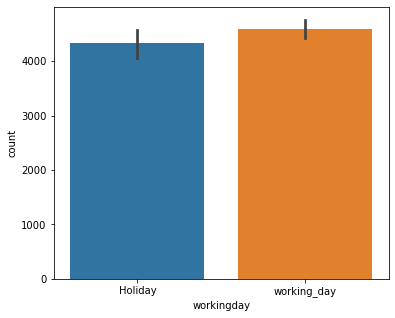

In [18]:
plt.figure(figsize=(6,5))
sns.barplot('workingday','count',data=bike_share)
plt.show()

#### Bikes seem to be rented more on working days.


#### 2) season

* spring
* summer
* fall
* winter

In [19]:
season = {1:'spring',2:'summer',3:'fall',4:'winter'}
bike_share['season'] = bike_share['season'].map(season)

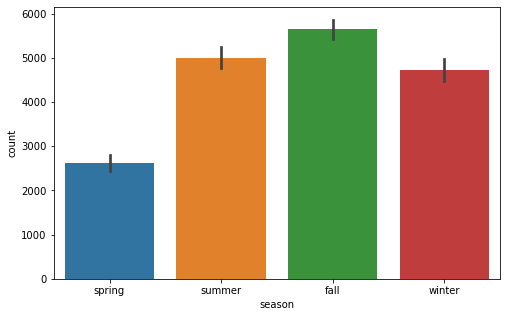

In [20]:
plt.figure(figsize=(8,5))
sns.barplot('season','count',data=bike_share)
plt.show()

#### Bike Rentals are more during the Fall season.

#### 3) weathersit

* 1: Clear, Few clouds, Partly cloudy, Partly cloudy
* 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
* 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
* 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [21]:
weather = {1:'Clear',2:'Mist',3:'Light Snow',4:'Heavy Rain'}
bike_share['weathersit'] = bike_share['weathersit'].map(weather)

In [22]:
bike_share.head()

,season,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,count,year,month
0,spring,6,Holiday,Mist,14.110847,18.18125,80.5833,10.749882,985,2018,1
1,spring,0,Holiday,Mist,14.902598,17.68695,69.6087,16.652113,801,2018,1
2,spring,1,working_day,Clear,8.050924,9.47025,43.7273,16.636703,1349,2018,1
3,spring,2,working_day,Clear,8.200000,10.60610,59.0435,10.739832,1562,2018,1
4,spring,3,working_day,Clear,9.305237,11.46350,43.6957,12.522300,1600,2018,1


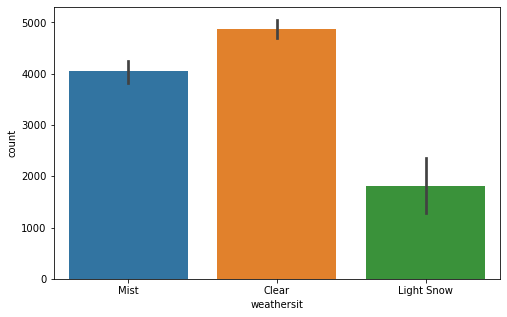

In [23]:
plt.figure(figsize=(8,5))
sns.barplot('weathersit','count',data=bike_share)
plt.show()

#### Bikes seem to be rented more in Clear, Few clouds, Partly cloudy weather.

#### 4) year

* 2018:0
* 2019:1

In [24]:
year = {2019:1,2018:0}
bike_share['year'] = bike_share['year'].map(year)

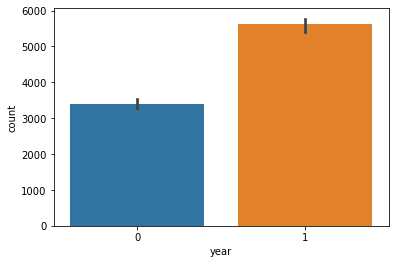

In [25]:
sns.barplot('year','count',data=bike_share)
plt.show()

#### Bike Rental has increased in 2019 when compared to 2018.

#### 5) Month

* 1:Jan
* 2:Feb
* 3:Mar
* 4:Apr
* 5:May
* 6:June
* 7:July
* 8:Aug
* 9:Sep
* 10:Oct
* 11:Nov
* 12:Dec

In [26]:
month = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
bike_share['month'] = bike_share['month'].map(month)

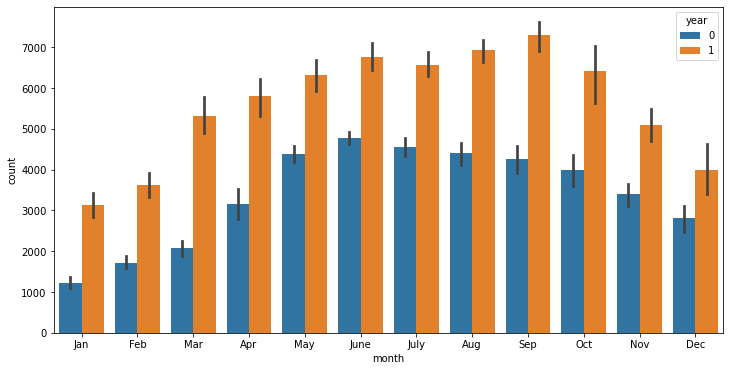

In [27]:
plt.figure(figsize=(12,6))
sns.barplot('month','count',hue='year',data=bike_share)
plt.show()

#### 6) WeekDay:
    
* 0:Mon
* 1:Tue
* 2:Wed
* 3:Thu
* 4:Fri
* 5:Sat
* 6:Sun

In [28]:
weekdays = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
bike_share['weekday'] = bike_share['weekday'].map(weekdays)

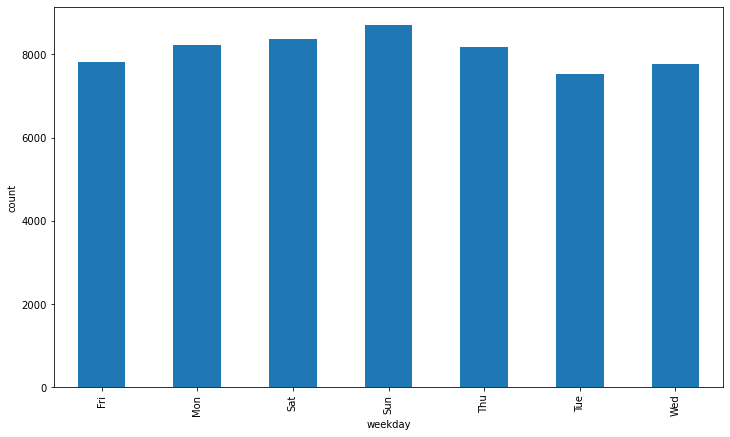

In [29]:
plt.figure(figsize=(12,7))
bike_share.groupby('weekday')['count'].max().plot(kind='bar')
plt.ylabel('count', fontsize = 10) 
plt.show()

#### Bike Rentals are maximum on Sunday and Saturday



#### 7) atemp

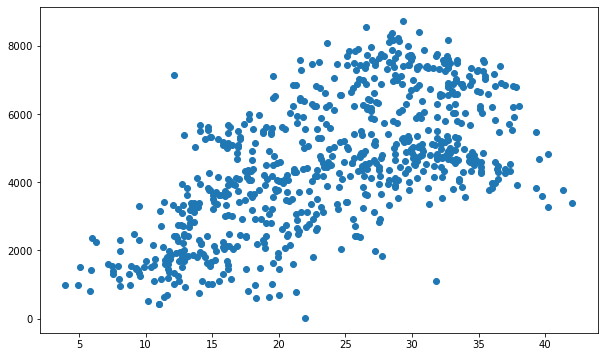

In [30]:
plt.figure(figsize = (10,6))
plt.scatter('atemp','count',data=bike_share)
plt.show()

#### Bike Rentals are observed at higher feeling temperatures.



#### 8) temp

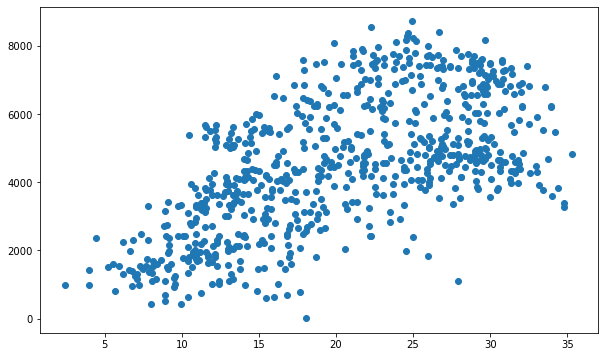

In [31]:
plt.figure(figsize = (10,6))
plt.scatter('temp','count',data=bike_share)
plt.show()

#### Bike Rentals are observed at higher temperatures.


#### 9) Windspeed

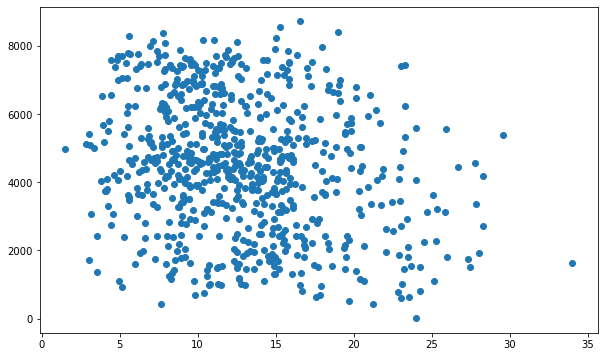

In [32]:
plt.figure(figsize = (10,6))
plt.scatter('windspeed','count',data=bike_share)
plt.show()

#### Bike Rentals are observed at lower windspeed.



#### 10) Humidity

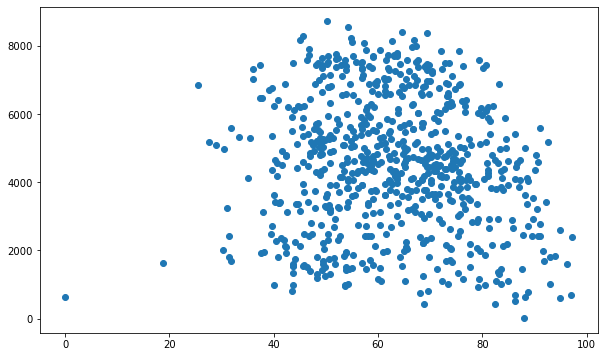

In [33]:
plt.figure(figsize = (10,6))
plt.scatter('humidity','count',data=bike_share)
plt.show()

#### Temperature being directly proportional to Humidity, Bike Rentals are in more demand during high humidity.


# Step 3: 

### Visualizing the Relationship among variables

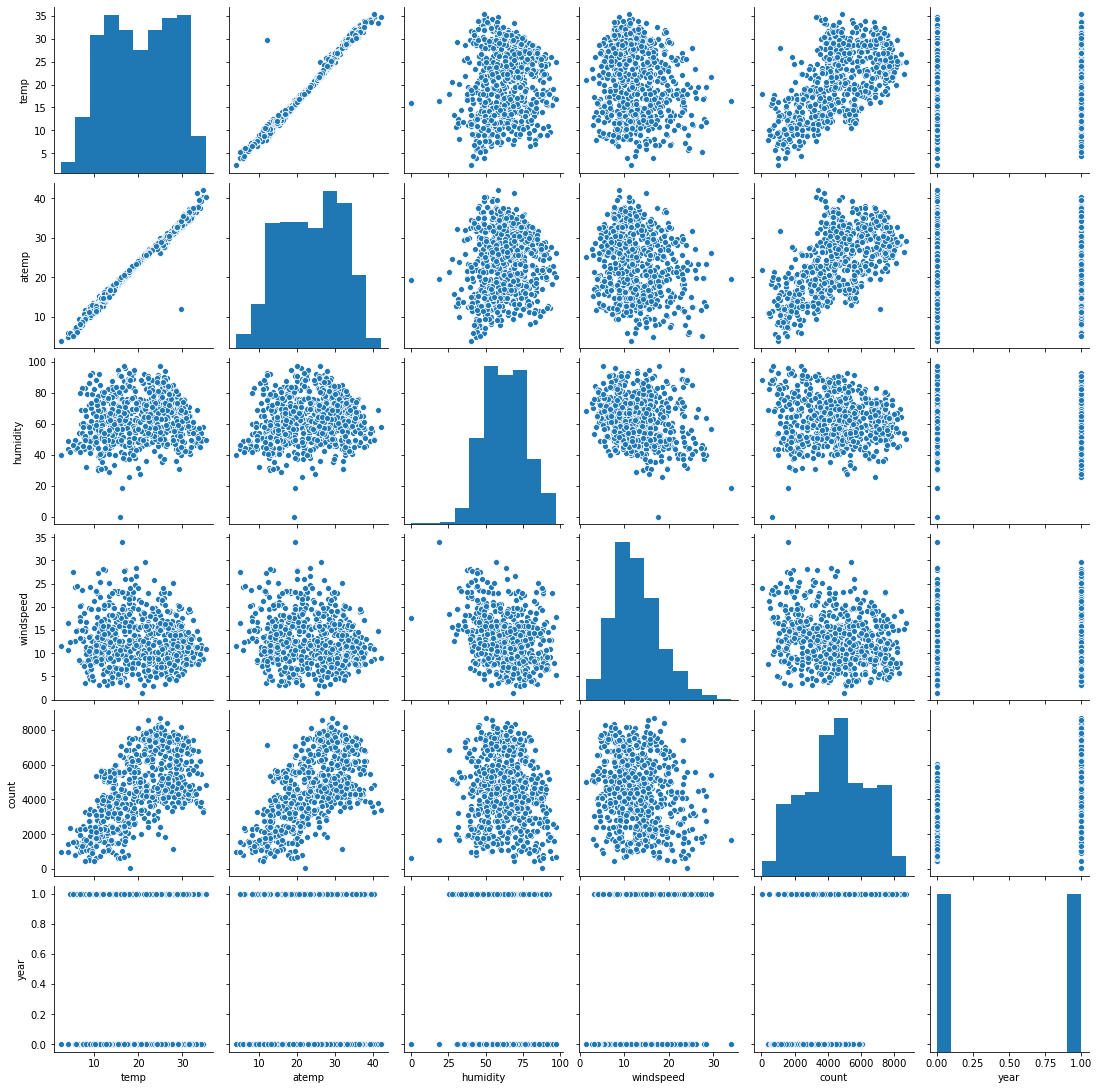

In [34]:
sns.pairplot(bike_share)
plt.show()

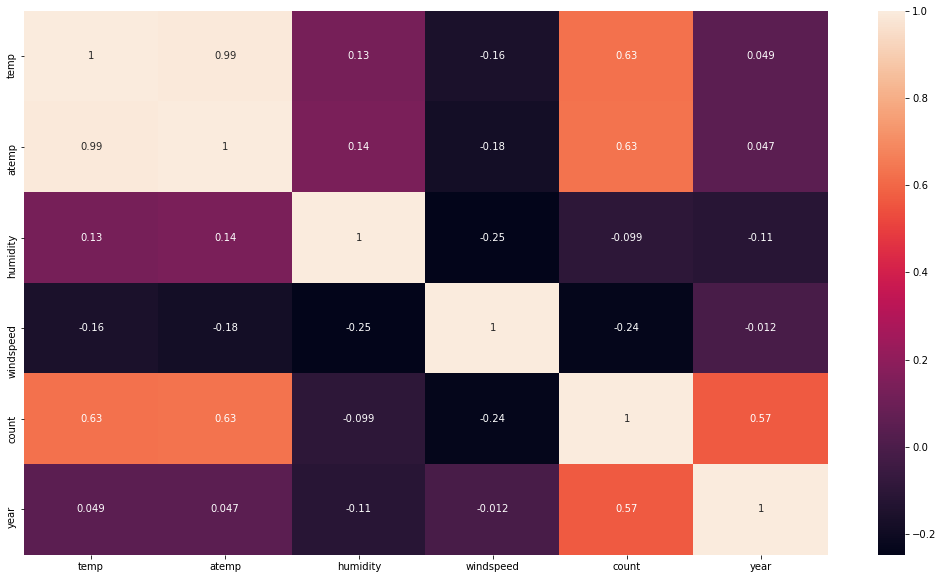

In [35]:
plt.figure(figsize = (18,10))
sns.heatmap(bike_share.corr(),annot=True)
plt.show()

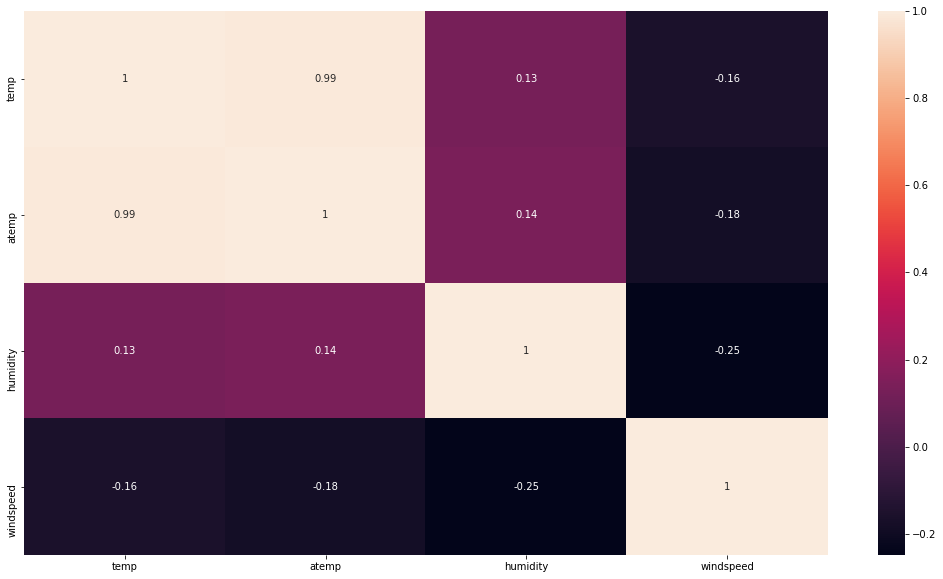

In [36]:
data= bike_share[['temp','atemp','humidity','windspeed']]
plt.figure(figsize = (18,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

#### It is seen that atemp and temp are highly correlated and one can be dropped to avoid multicollinearity.

In [37]:
bike_share.drop('atemp',axis=1,inplace=True)

In [38]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   weekday     730 non-null    object 
 2   workingday  730 non-null    object 
 3   weathersit  730 non-null    object 
 4   temp        730 non-null    float64
 5   humidity    730 non-null    float64
 6   windspeed   730 non-null    float64
 7   count       730 non-null    int64  
 8   year        730 non-null    int64  
 9   month       730 non-null    object 
dtypes: float64(3), int64(2), object(5)
memory usage: 57.2+ KB


In [39]:
bike_share.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month
0,spring,Sun,Holiday,Mist,14.110847,80.5833,10.749882,985,0,Jan
1,spring,Mon,Holiday,Mist,14.902598,69.6087,16.652113,801,0,Jan
2,spring,Tue,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan
3,spring,Wed,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan
4,spring,Thu,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan


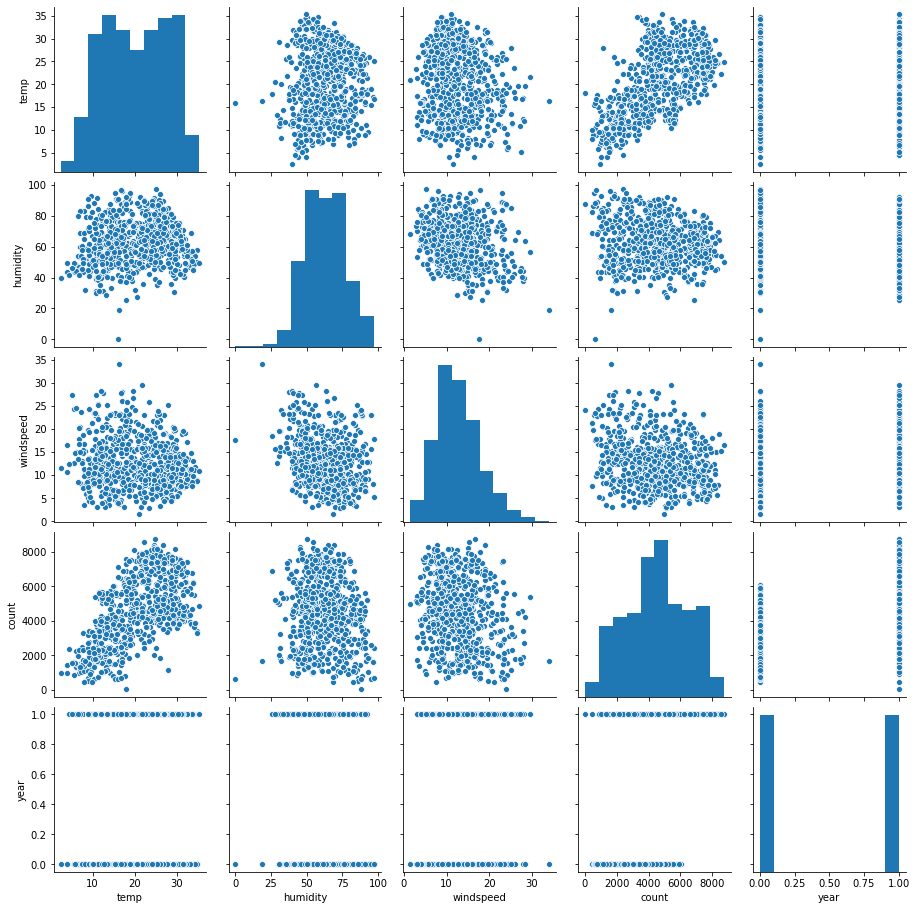

In [40]:
sns.pairplot(bike_share)
plt.show()

# Step 4 : 

### Handling Categorical Variables


In [41]:
seasons = pd.get_dummies(bike_share['season'],drop_first=True)

working_day = pd.get_dummies(bike_share['workingday'],drop_first=True)

weather= pd.get_dummies(bike_share['weathersit'],drop_first=True)

month= pd.get_dummies(bike_share['month'],drop_first=True)

week_day= pd.get_dummies(bike_share['weekday'],drop_first=True)

In [42]:
bike_share= pd.concat([bike_share,seasons,working_day,weather,month,week_day],axis=1)

In [43]:
bike_share.head()

,season,weekday,workingday,weathersit,temp,humidity,windspeed,count,year,month,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,spring,Sun,Holiday,Mist,14.110847,80.5833,10.749882,985,0,Jan,...,0,0,0,0,0,0,1,0,0,0
1,spring,Mon,Holiday,Mist,14.902598,69.6087,16.652113,801,0,Jan,...,0,0,0,0,1,0,0,0,0,0
2,spring,Tue,working_day,Clear,8.050924,43.7273,16.636703,1349,0,Jan,...,0,0,0,0,0,0,0,0,1,0
3,spring,Wed,working_day,Clear,8.200000,59.0435,10.739832,1562,0,Jan,...,0,0,0,0,0,0,0,0,0,1
4,spring,Thu,working_day,Clear,9.305237,43.6957,12.522300,1600,0,Jan,...,0,0,0,0,0,0,0,1,0,0


In [44]:
bike_share.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   weekday      730 non-null    object 
 2   workingday   730 non-null    object 
 3   weathersit   730 non-null    object 
 4   temp         730 non-null    float64
 5   humidity     730 non-null    float64
 6   windspeed    730 non-null    float64
 7   count        730 non-null    int64  
 8   year         730 non-null    int64  
 9   month        730 non-null    object 
 10  spring       730 non-null    uint8  
 11  summer       730 non-null    uint8  
 12  winter       730 non-null    uint8  
 13  working_day  730 non-null    uint8  
 14  Light Snow   730 non-null    uint8  
 15  Mist         730 non-null    uint8  
 16  Aug          730 non-null    uint8  
 17  Dec          730 non-null    uint8  
 18  Feb          730 non-null    uint8  
 19  Jan     

In [45]:
# Dropping the categorical variables which dummy-encoded.

bike_share.drop(['workingday','season','weekday','weathersit','month'],axis=1,inplace=True)

In [46]:
bike_share.head()

,temp,humidity,windspeed,count,year,spring,summer,winter,working_day,Light Snow,...,May,Nov,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed
0,14.110847,80.5833,10.749882,985,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,14.902598,69.6087,16.652113,801,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,8.050924,43.7273,16.636703,1349,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,8.200000,59.0435,10.739832,1562,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,9.305237,43.6957,12.522300,1600,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


# Step 5: 

### Splitting the Data into Training and Testing Sets

In [47]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike_share, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features


In [48]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [49]:
#  Apply scaler() to all the columns except the'dummy' variables.

num_vars=['temp','humidity','windspeed','count']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

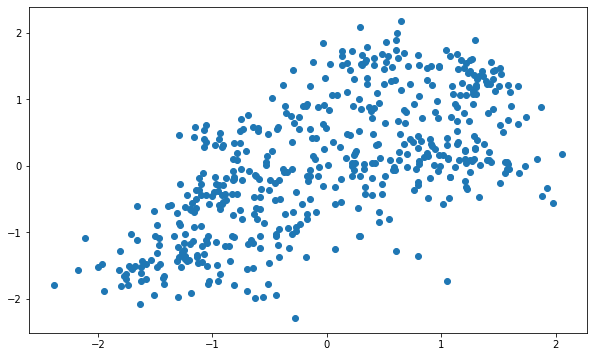

In [50]:
plt.figure(figsize = (10,6))
plt.scatter('temp','count',data=df_train)
plt.show()

Dividing into X and Y sets for the model building

In [51]:
y_train = df_train.pop('count')
X_train = df_train

# Step 6: 

### Building a linear model
    


### Using Recursive feature elimination(RFE) for automated Feature Selection approach

In [52]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [53]:
# Running RFE with the output number of the variable equal to 10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10) # running RFE
rfe = rfe.fit(X_train, y_train)

In [54]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('temp', True, 1),
 ('humidity', False, 10),
 ('windspeed', False, 8),
 ('year', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', False, 2),
 ('working_day', True, 1),
 ('Light Snow', True, 1),
 ('Mist', True, 1),
 ('Aug', False, 11),
 ('Dec', False, 4),
 ('Feb', False, 6),
 ('Jan', False, 5),
 ('July', True, 1),
 ('June', False, 17),
 ('Mar', False, 18),
 ('May', False, 9),
 ('Nov', False, 3),
 ('Oct', False, 14),
 ('Sep', True, 1),
 ('Mon', True, 1),
 ('Sat', False, 15),
 ('Sun', True, 1),
 ('Thu', False, 16),
 ('Tue', False, 12),
 ('Wed', False, 13)]

In [55]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'year', 'spring', 'working_day', 'Light Snow', 'Mist', 'July',
       'Sep', 'Mon', 'Sun'],
      dtype='object')

In [56]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [57]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [58]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [59]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.7
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          3.30e-179
Time:                        18:47:55   Log-Likelihood:                -285.08
No. Observations:                 510   AIC:                             592.2
Df Residuals:                     499   BIC:                             638.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.6092      0.122     -4.974      0.000      -0.850      -0.369
temp            0.3984      0.027     14.773      0.000       0.345       0.451
year            1.0451      0.038     27.326      0.000       0.970       1.120
spring         -0.6819      0.056    -12.116      0.000      -0.792      -0.571
working_day     0.4421      0.122      3.633      0.000       0.203       0.681
Light Snow     -1.3226      0.114    -11.586      0.000      -1.547      -1.098
Mist           -0.3671      0.041     -8.999      0.000      -0.447      -0.287
July           -0.3011      0.081     -3.734      0.000      -0.460      -0.143
Sep             0.2845      0.073      3.900      0.000       0.141       0.428
Mon             0.2462      0.129      1.902      0.058      -0.008       0.500
Sun             0.4841      0.129      3.762      0.000       0.231       0.737
==============================================================================
Omnibus:                       59.973   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.538
Skew:                          -0.597   Prob(JB):                     4.57e-34
Kurtosis:                       5.408   Cond. No.                         18.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Dropping Mon as it has P value greater than 5% and is insignificant.

In [60]:
X_train1= X_train_rfe.drop('Mon',1)

In [61]:
X_train2= sm.add_constant(X_train1)
lm1 = sm.OLS(y_train,X_train2).fit() 

In [62]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     252.4
Date:                Mon, 30 Nov 2020   Prob (F-statistic):          1.22e-179
Time:                        18:48:05   Log-Likelihood:                -286.92
No. Observations:                 510   AIC:                             593.8
Df Residuals:                     500   BIC:                             636.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.4002      0.054     -7.374      0.000      -0.507      -0.294
temp            0.3999      0.027     14.797      0.000       0.347       0.453
year            1.0458      0.038     27.273      0.000       0.970       1.121
spring         -0.6842      0.056    -12.129      0.000      -0.795      -0.573
working_day     0.2327      0.052      4.476      0.000       0.131       0.335
Light Snow     -1.3185      0.114    -11.522      0.000      -1.543      -1.094
Mist           -0.3647      0.041     -8.922      0.000      -0.445      -0.284
July           -0.2972      0.081     -3.676      0.000      -0.456      -0.138
Sep             0.2757      0.073      3.777      0.000       0.132       0.419
Sun             0.2749      0.067      4.102      0.000       0.143       0.407
==============================================================================
Omnibus:                       62.219   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              160.183
Skew:                          -0.617   Prob(JB):                     1.65e-35
Kurtosis:                       5.452   Cond. No.                         8.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Now we have all the variables with p-value less than 0.05.


In [63]:
X_train_new= X_train2.drop('const',axis=1)

### Variance Inflation Factor(VIF)

In [64]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,working_day,2.28
0,temp,2.02
2,spring,2.02
1,year,1.80
5,Mist,1.50
6,July,1.35
8,Sun,1.28
7,Sep,1.17
4,Light Snow,1.06


#### All the variables have VIF less than 5 and it's perfect!

# Step 7: 

### Residual Analysis of the train data

In [65]:
y_train_pred = lm1.predict(X_train2)

<Figure size 432x288 with 0 Axes>

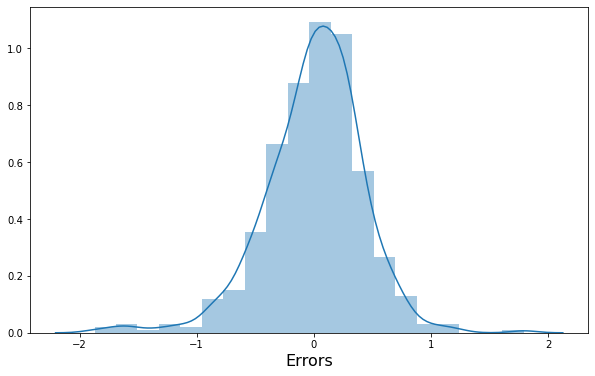

In [66]:
fig = plt.figure()
plt.figure(figsize = (10,6))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 18)                  
plt.xlabel('Errors', fontsize = 16)    
plt.show()

# Step 8: 

### Making Predictions


In [67]:
num_vars=['temp','humidity','windspeed','count']

df_test[num_vars]= scaler.transform(df_test[num_vars])

#### Dividing into X_test and y_test


In [68]:
y_test = df_test.pop('count')
X_test = df_test

In [69]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [70]:
# Making predictions
y_pred = lm1.predict(X_test_new)

# Step 9: 

### Model Evaluation


<Figure size 432x288 with 0 Axes>

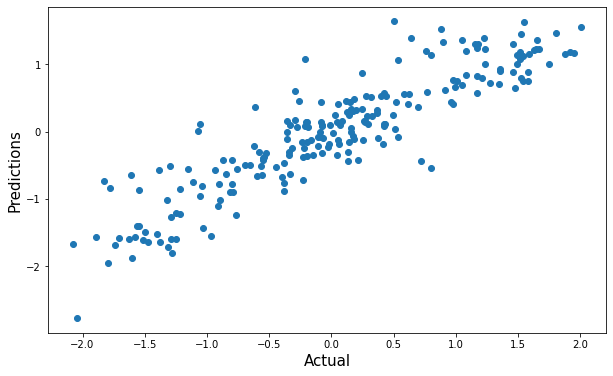

In [71]:
# Plotting y_test and y_pred to understand the spread.

fig = plt.figure()
plt.figure(figsize = (10,6))
plt.scatter(y_test,y_pred)
fig.suptitle('Actual vs Prediction', fontsize=22)              
plt.xlabel('Actual', fontsize=15)                          
plt.ylabel('Predictions', fontsize=15)  
plt.show()

In [72]:
# FInding r2_score between y_test and y_pred

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8075114920782749

# Conclusion:
### The top 3 variables that are seen effecting and benefitting the Bike Rental count are as follows:

* Spring season : -0.6842
* Temperature : 0.3999
* Mist : -0.3647

### Assumptions of Linear Regression:
    
* The error terms are normally distributed.
* The train and test accuracy are nearly equal 
* The predicted values have linear relationship with the actual values.
* There is no Overfit/Underfit situation.